Consensus Timeのプロット

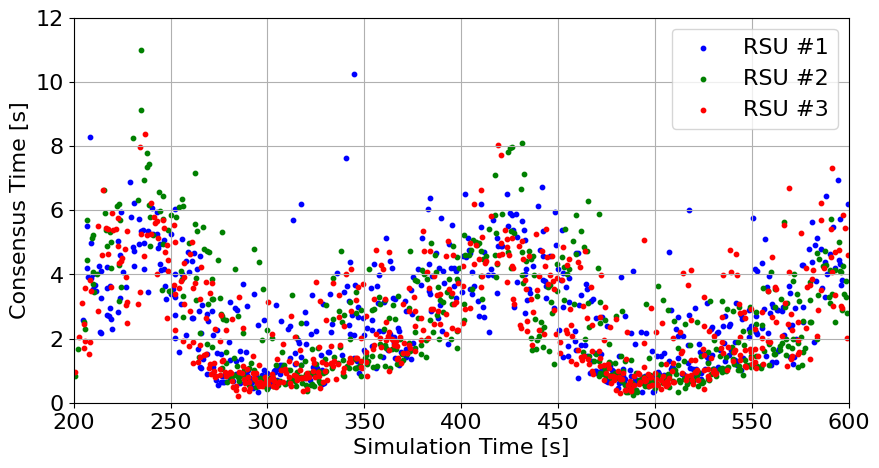

In [34]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    # proposer_df = pd.read_csv(input_folder_path + "ordering_event.csv")
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list



# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0,1,2]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    # RL + immu
    # input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    # nearest RSU + immu
    # input_folder_path = "../../results/multi_rsu_congestion/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    # random + immu
    input_folder_path = "../../results/multi_rsu_congestion_random/vs70/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
  
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.scatter(start_time_2lists[0], consensus_time_2lists[0], c='blue', marker='o', s=10, label='RSU #1')
plt.scatter(start_time_2lists[1], consensus_time_2lists[1], c='green', marker='o', s=10, label='RSU #2')
plt.scatter(start_time_2lists[2], consensus_time_2lists[2], c='red', marker='o', s=10, label='RSU #3')
plt.xlabel('Simulation Time [s]', fontsize=16)
plt.ylabel('Consensus Time [s]', fontsize=16)

plt.ylim(0, 12)
plt.xlim(200, 600)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=16)
plt.show()






再度実験
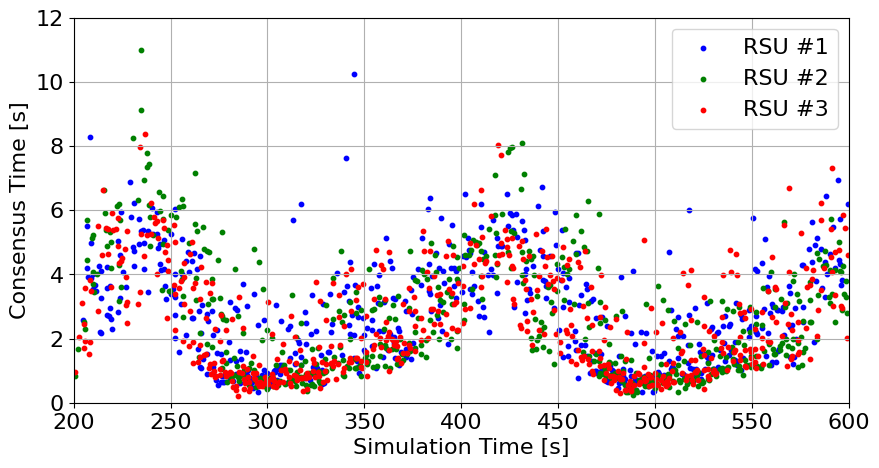

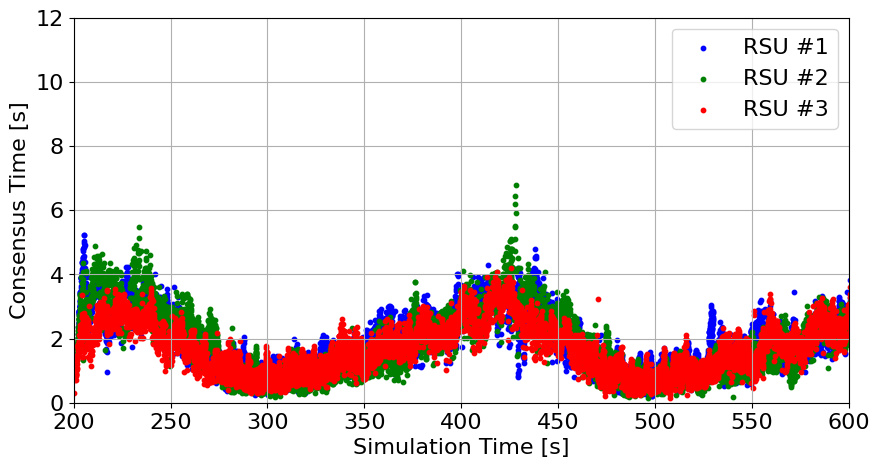

新しい実験結果（nearest RSU）
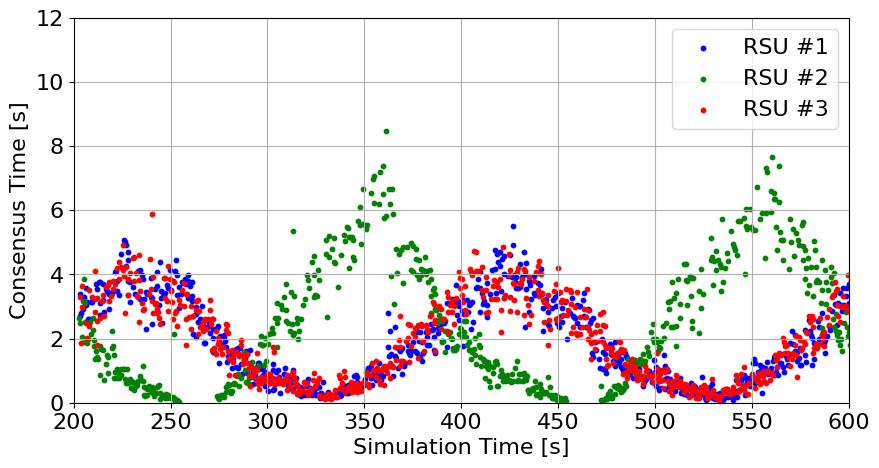

論文に記載のimmu+RLの結果

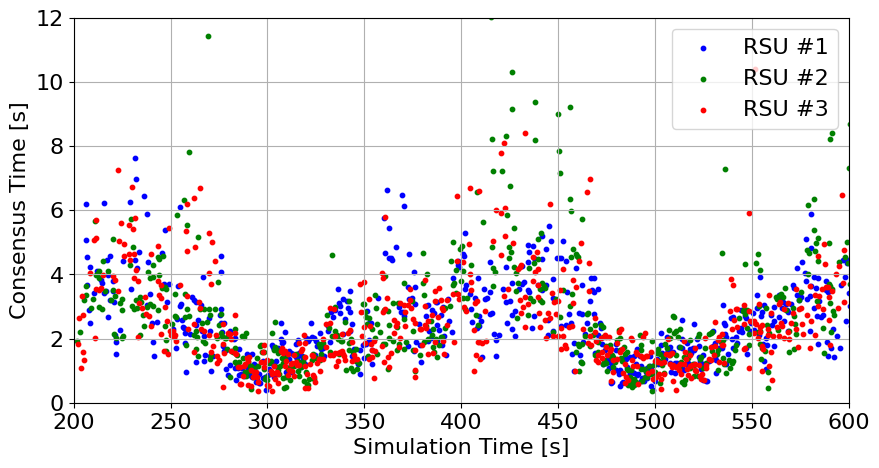


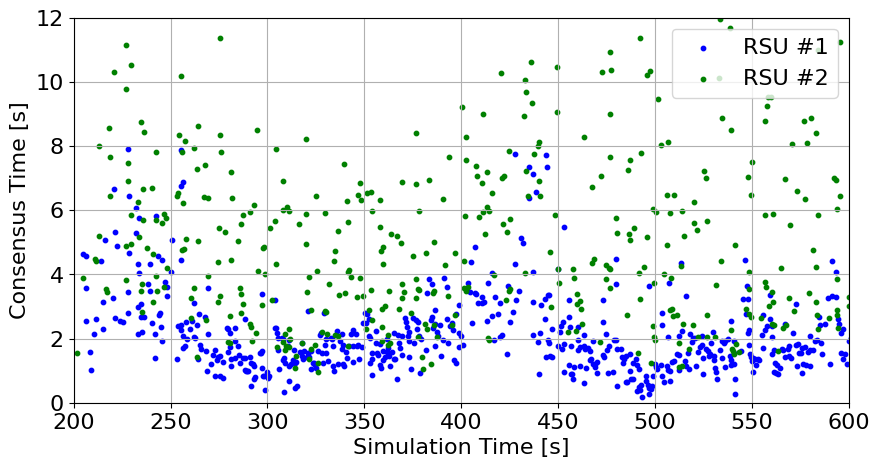

CDF(Cumulative Distribution Function)のプロット

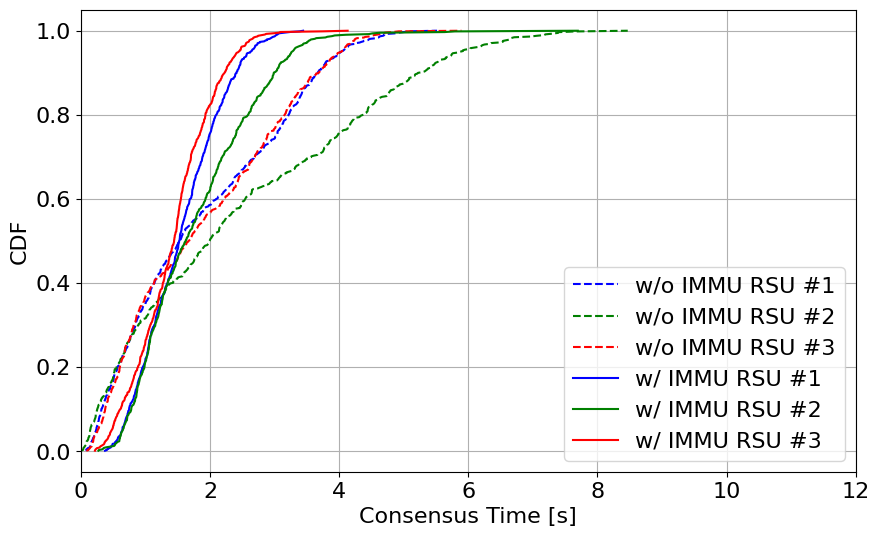

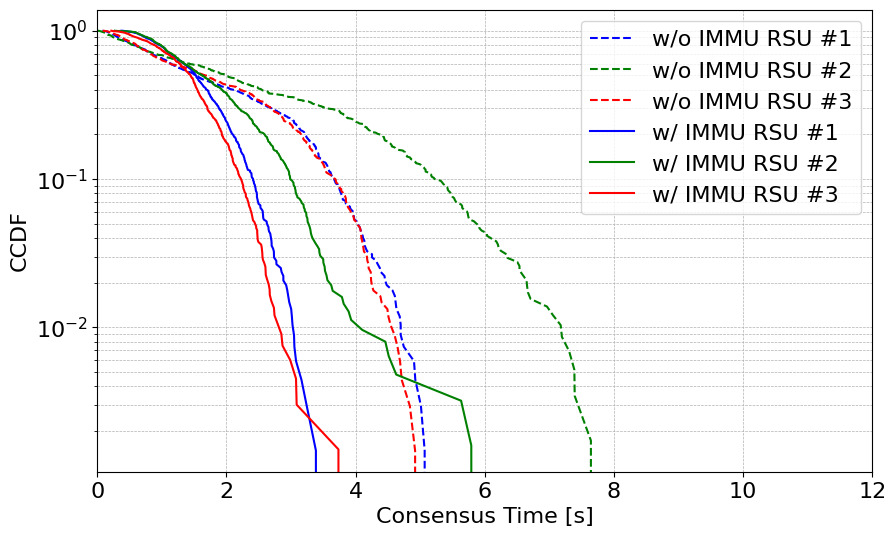

In [20]:
import numpy as np
from scipy.stats import norm

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]
time_threshold = 600

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []

for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    # 条件を満たすインデックスを取得
    filtered_indices = [i for i, time in enumerate(start_time_list) if time < time_threshold]
    
    # インデックスに基づいてリストをフィルタリング
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]
    
    start_time_2lists_no_rl.append(filtered_start_time_list)
    consensus_time_2lists_no_rl.append(filtered_consensus_time_list)


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    # 条件を満たすインデックスを取得
    filtered_indices = [i for i, time in enumerate(start_time_list) if time < time_threshold]
    
    # インデックスに基づいてリストをフィルタリング
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]
    
    start_time_2lists_with_rl.append(filtered_start_time_list)
    consensus_time_2lists_with_rl.append(filtered_consensus_time_list)


# # データをソート
# sorted_data = np.sort(consensus_time_list)
# # 経験的なCDFの計算
# cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# # プロット
# plt.figure(figsize=(8, 5))
# plt.plot(sorted_data, cdf_values, marker='o', linestyle='-', color='b', label="Empirical CDF")


# plt.xlabel("Data values")
# plt.ylabel("CDF")
# plt.title("Cumulative Distribution Function (CDF)")
# plt.grid(True)
# plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))

# # consensus_time_2lists_no_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='-', label=f"No RL Proposer {i}")

# # consensus_time_2lists_with_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='--', label=f"With RL Proposer {i}")


# # グラフの詳細設定（フォントサイズの調整）
# plt.xlabel("Consensus Time", fontsize=14)
# plt.ylabel("CDF", fontsize=14)
# plt.title("Cumulative Distribution Function (CDF) for Consensus Times", fontsize=16)
# plt.xlim(0, 30)  # X軸の最大値を30に設定
# plt.grid(True)
# plt.legend(fontsize=12)
# plt.show()


# 色のリスト
colors = ['b', 'g', 'r']  # プロポーザごとに異なる色を設定

# CDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"w/o IMMU RSU #{i+1}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"w/ IMMU RSU #{i+1}")

plt.xlabel("Consensus Time [s]", fontsize=16)
plt.ylabel("CDF", fontsize=16)
# plt.title("CDF for Consensus Times", fontsize=20)
plt.xlim(0, 12)  # X軸の最大値を30に設定
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"w/o IMMU RSU #{i+1}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"w/ IMMU RSU #{i+1}")

# 縦軸を対数スケールに設定
plt.yscale("log")

# グラフの詳細設定
plt.xlabel("Consensus Time [s]", fontsize=16)
plt.ylabel("CCDF", fontsize=16)
# plt.title("CCDF for Consensus Times", fontsize=20)
plt.xlim(0, 12)  # X軸の最大値を30に設定
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Nearest Policy,Random Policy,Reinforce Learningの結果

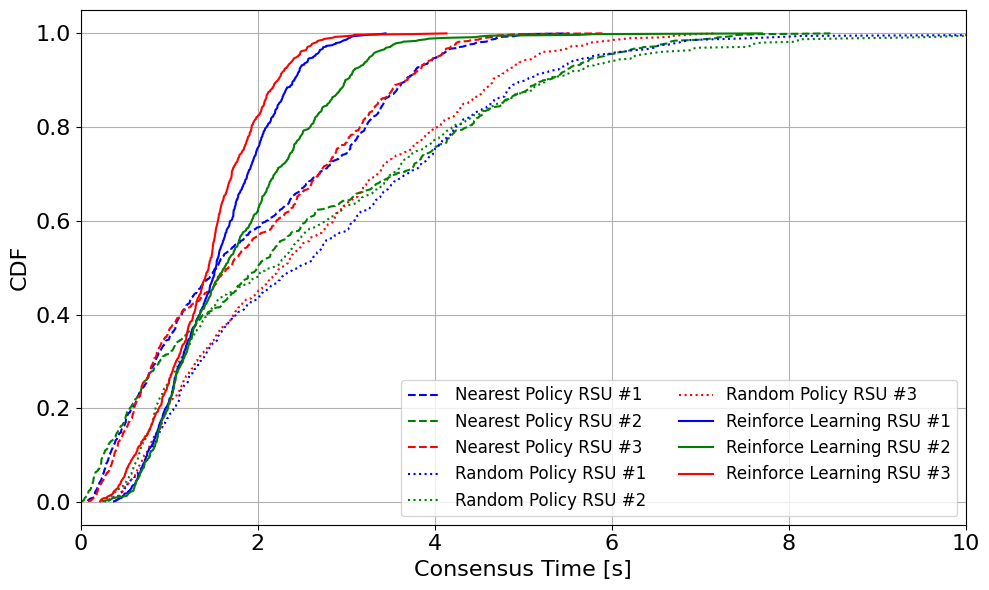

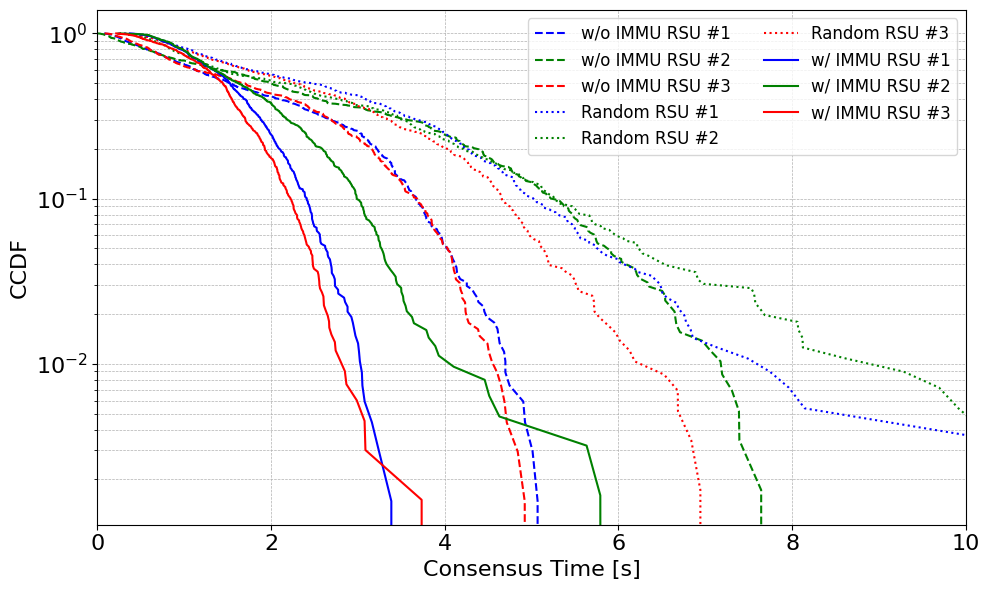

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # 未使用でもそのまま残しています

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]
time_threshold = 600  # [s]

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []
# ★ 追加：random 用
start_time_2lists_random = []
consensus_time_2lists_random = []

# --- w/o IMMU ---
for proposer_id in proposer_id_list:
    input_folder_path = (
        "../../results/multi_rsu_congestion/vs"
        + str(vehicle_speed) + "_" + str(min_vehicle_speed)
        + "/n" + str(participant_size)
        + "/m" + str(message_size)
        + "/d" + str(network_delay)
        + "/" + str(proposer_id) + "/"
    )
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    filtered_indices = [i for i, t in enumerate(start_time_list) if t < time_threshold]
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]

    start_time_2lists_no_rl.append(filtered_start_time_list)
    consensus_time_2lists_no_rl.append(filtered_consensus_time_list)

# --- w/ IMMU ---
for proposer_id in proposer_id_list:
    input_folder_path = (
        "../../results/multi_rsu_congestion_with_immu/wd/vs"
        + str(vehicle_speed) + "_" + str(min_vehicle_speed)
        + "/n" + str(participant_size)
        + "/m" + str(message_size)
        + "/d" + str(network_delay)
        + "/" + str(proposer_id) + "/"
    )
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    filtered_indices = [i for i, t in enumerate(start_time_list) if t < time_threshold]
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]

    start_time_2lists_with_rl.append(filtered_start_time_list)
    consensus_time_2lists_with_rl.append(filtered_consensus_time_list)

# --- ★追加：Random ---
for proposer_id in proposer_id_list:
    input_folder_path = (
        "../../results/multi_rsu_congestion_random/vs"
        + str(vehicle_speed) + "_" + str(min_vehicle_speed)
        + "/n" + str(participant_size)
        + "/m" + str(message_size)
        + "/d" + str(network_delay)
        + "/" + str(proposer_id) + "/"
    )
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    filtered_indices = [i for i, t in enumerate(start_time_list) if t < time_threshold]
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]

    start_time_2lists_random.append(filtered_start_time_list)
    consensus_time_2lists_random.append(filtered_consensus_time_list)

# 色（RSUごとに固定）
colors = ['b', 'g', 'r']

# ===== CDF =====
plt.figure(figsize=(10, 6))

# w/o IMMU（破線）
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    if len(consensus_time_list) == 0: 
        continue
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"Nearest Policy RSU #{i+1}")

# Random（点線：）
for i, consensus_time_list in enumerate(consensus_time_2lists_random):
    if len(consensus_time_list) == 0: 
        continue
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle=':', color=colors[i], label=f"Random Policy RSU #{i+1}")

# w/ IMMU（実線）
for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    if len(consensus_time_list) == 0: 
        continue
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"Reinforce Learning RSU #{i+1}")

plt.xlabel("Consensus Time [s]", fontsize=16)
plt.ylabel("CDF", fontsize=16)
plt.xlim(0, 10)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12, ncol=2)  # エントリが増えるので列分け
plt.tight_layout()
plt.show()

# ===== CCDF =====
plt.figure(figsize=(10, 6))

# w/o IMMU（破線）
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    if len(consensus_time_list) == 0: 
        continue
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"w/o IMMU RSU #{i+1}")


# Random（点線：）
for i, consensus_time_list in enumerate(consensus_time_2lists_random):
    if len(consensus_time_list) == 0: 
        continue
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle=':', color=colors[i], label=f"Random RSU #{i+1}")

# w/ IMMU（実線）
for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    if len(consensus_time_list) == 0: 
        continue
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"w/ IMMU RSU #{i+1}")

plt.yscale("log")
plt.xlabel("Consensus Time [s]", fontsize=16)
plt.ylabel("CCDF", fontsize=16)
plt.xlim(0, 10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12, ncol=2)
plt.tight_layout()
plt.show()


標準偏差の時間変化

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list



# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    # input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

    print(start_time_list, consensus_time_list)




[206.201, 206.12, 206.772, 206.772, 208.22899999999998, 208.092, 208.58, 210.532, 211.968, 215.435, 214.053, 214.686, 215.421, 216.996, 216.563, 217.724, 218.86599999999999, 217.566, 218.946, 220.094, 220.305, 221.054, 221.207, 221.719, 222.025, 225.409, 224.043, 229.16, 231.88, 232.049, 229.621, 231.775, 232.526, 233.755, 236.267, 238.026, 238.493, 238.054, 239.34, 240.303, 240.883, 241.303, 242.86599999999999, 245.653, 247.238, 245.96800000000002, 246.548, 248.124, 249.372, 265.545, 254.793, 251.531, 253.724, 253.224, 252.849, 254.731, 255.375, 255.963, 256.425, 256.956, 257.359, 257.719, 257.89, 260.939, 260.294, 262.272, 262.921, 263.21, 263.953, 263.21, 265.593, 266.995, 266.25, 267.023, 267.126, 267.806, 269.693, 270.21, 270.198, 270.984, 272.085, 275.815, 275.998, 275.508, 276.2, 276.293, 276.509, 277.374, 277.216, 277.733, 278.56399999999996, 278.871, 280.65, 279.777, 280.801, 281.808, 282.817, 283.372, 283.032, 283.547, 285.098, 285.067, 285.475, 286.156, 286.889, 287.252, 287

[206.201, 206.12, 206.772, 206.772, 208.22899999999998, 208.092, 208.58, 210.532, 211.968, 215.435, 214.053, 214.686, 215.421, 216.996, 216.563, 217.724, 218.86599999999999, 217.566, 218.946, 220.094, 220.305, 221.054, 221.207, 221.719, 222.025, 225.409, 224.043, 229.16, 231.88, 232.049, 229.621, 231.775, 232.526, 233.755, 236.267, 238.026, 238.493, 238.054, 239.34, 240.303, 240.883, 241.303, 242.86599999999999, 245.653, 247.238, 245.96800000000002, 246.548, 248.124, 249.372, 265.545, 254.793, 251.531, 253.724, 253.224, 252.849, 254.731, 255.375, 255.963, 256.425, 256.956, 257.359, 257.719, 257.89, 260.939, 260.294, 262.272, 262.921, 263.21, 263.953, 263.21, 265.593, 266.995, 266.25, 267.023, 267.126, 267.806, 269.693, 270.21, 270.198, 270.984, 272.085, 275.815, 275.998, 275.508, 276.2, 276.293, 276.509, 277.374, 277.216, 277.733, 278.56399999999996, 278.871, 280.65, 279.777, 280.801, 281.808, 282.817, 283.372, 283.032, 283.547, 285.098, 285.067, 285.475, 286.156, 286.889, 287.252, 287

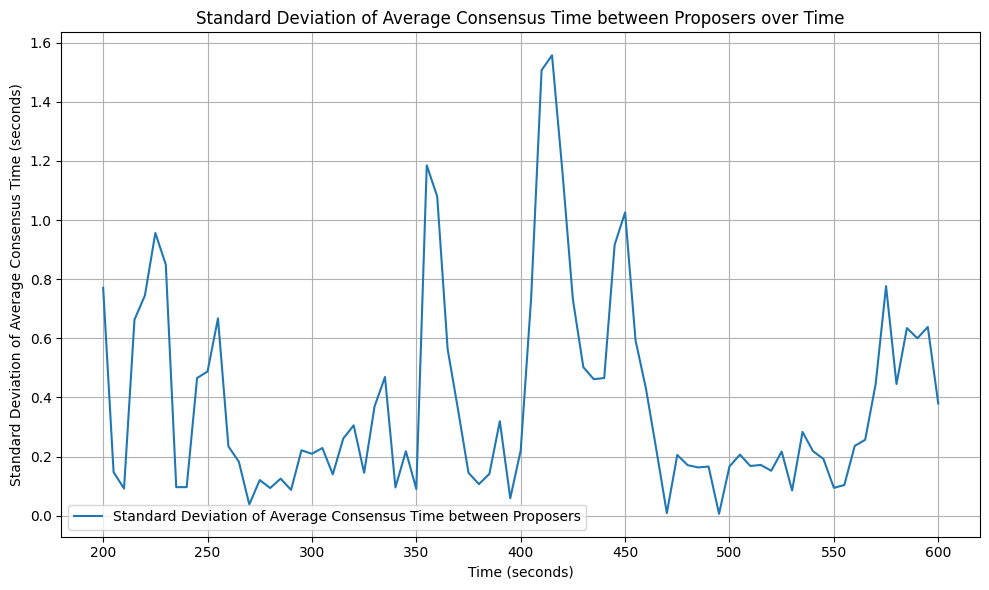

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):
    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists = []
consensus_time_2lists = []

# 時間帯を10秒刻みで区切る
time_bins = np.arange(200, 601, 5)

# 各プロポーザーのstart_time_listとconsensus_time_listを取得
for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

    print(start_time_list, consensus_time_list)

# 各時間帯での10秒間の合意形成時間の平均を計算
averages_by_time_bin = {proposer_id: [] for proposer_id in proposer_id_list}

# 10秒間隔での合意形成時間の平均を計算
for time_bin in time_bins:
    for proposer_id in proposer_id_list:
        consensus_times_in_bin = []

        start_times = start_time_2lists[proposer_id]
        consensus_time_list = consensus_time_2lists[proposer_id]
        
        # 現在の時間帯に該当するconsensus_timeを収集
        for start_time, consensus_time in zip(start_times, consensus_time_list):
            if time_bin <= start_time < time_bin + 10:  # 10秒刻みでチェック
                consensus_times_in_bin.append(consensus_time)

        if consensus_times_in_bin:
            averages_by_time_bin[proposer_id].append(np.mean(consensus_times_in_bin))
        else:
            averages_by_time_bin[proposer_id].append(np.nan)

# proposer間の平均時間の標準偏差を算出
std_devs_by_time_bin = []

for i in range(len(time_bins)):
    time_bin_averages = []
    for proposer_id in proposer_id_list:
        time_bin_averages.append(averages_by_time_bin[proposer_id][i])

    # 各時間帯での平均の標準偏差を計算
    std_devs_by_time_bin.append(np.std(time_bin_averages))

# プロット
plt.figure(figsize=(10, 6))

# proposer間の平均合意形成時間の標準偏差を時間変化としてプロット
plt.plot(time_bins, std_devs_by_time_bin, label="Standard Deviation of Average Consensus Time between Proposers")
plt.xlabel("Time (seconds)")
plt.ylabel("Standard Deviation of Average Consensus Time (seconds)")
plt.title("Standard Deviation of Average Consensus Time between Proposers over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
